In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

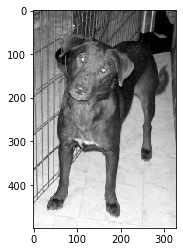

In [2]:
dataDir = "F:/Dataset/dogs-cats-images/dataset/training_set/"
categories = ["dogs", "cats"]

for categ in categories:
    path=os.path.join(dataDir,categ)#combines the path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
    

In [3]:
img_array.shape

(499, 327)

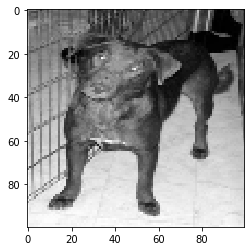

In [15]:
img_size = 100
new_img_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_img_array,cmap="gray")
plt.show()
# for n_img in new_img_array:
#     print(n_img)
    

In [1]:
#================================================code starts from here ====================================================
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
training_data=[]
dataDir = "F:/Dataset/dogs-cats-images/dataset/training_set/"
categories = ["dogs", "cats"]
img_size = 100
def prepare_training_data():
    for categ in categories:
        path=os.path.join(dataDir,categ)#combines the path
        classi_num = categories.index(categ)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_img_array,classi_num])
prepare_training_data()

8000

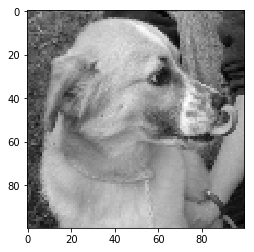

In [2]:
v1=training_data[511][0]
plt.imshow(v1,cmap="gray")
len(training_data)

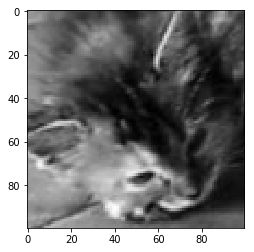

In [3]:
#To make the network learn efficiently we have to shuffle

import random
random.shuffle(training_data)



plt.imshow(training_data[8][0],cmap="gray")

In [4]:
# we have to separate training data and the target
X = []
y = []
for feature,label in training_data:
    X.append(feature)
    y.append(label)
X = np.array(X).reshape(-1,img_size,img_size,1)

In [43]:
X.shape[1:]

(100, 100, 1)

In [5]:
#saving the training the data set ................ i.e X and y

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [6]:
Z=[]
pickle_in = open("X.pickle","rb")
X=pickle.load(pickle_in)
X[0].shape

(100, 100, 1)

In [10]:
#===============================================deeplearning code=====================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

X = pickle.load(open("X.pickle","rb"))
Y = pickle.load(open("y.pickle","rb"))


array([[[[212],
         [217],
         [217],
         ...,
         [ 59],
         [ 57],
         [ 56]],

        [[208],
         [206],
         [207],
         ...,
         [ 57],
         [ 57],
         [ 54]],

        [[206],
         [208],
         [208],
         ...,
         [ 57],
         [ 56],
         [ 56]],

        ...,

        [[ 64],
         [ 10],
         [ 16],
         ...,
         [124],
         [157],
         [157]],

        [[ 82],
         [  9],
         [ 19],
         ...,
         [126],
         [150],
         [158]],

        [[ 89],
         [ 17],
         [ 14],
         ...,
         [109],
         [153],
         [160]]],


       [[[ 32],
         [ 32],
         [ 74],
         ...,
         [138],
         [127],
         [136]],

        [[ 65],
         [124],
         [109],
         ...,
         [134],
         [149],
         [129]],

        [[115],
         [121],
         [111],
         ...,
         [134],
         [

In [48]:
# Normalizing

X = X/255.0

model = Sequential()

model.add(Conv2D(16,(3,3),input_shape=(100,100,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))




In [49]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 98, 98, 16)        160       
_________________________________________________________________
activation_32 (Activation)   (None, 98, 98, 16)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 47, 47, 32)        4640      
_________________________________________________________________
activation_33 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 21, 21, 64)      

In [50]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"] )

In [ ]:
#training the dataset

model.fit(X,y,batch_size=4,epochs=30,validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/30
7200/7200 [==============================] - 62s 9ms/sample - loss: 0.6932 - acc: 0.5040 - val_loss: 0.6928 - val_acc: 0.5337
Epoch 2/30
7200/7200 [==============================] - 61s 9ms/sample - loss: 0.6932 - acc: 0.5038 - val_loss: 0.6941 - val_acc: 0.4663
Epoch 3/30
4672/7200 [==================>...........] - ETA: 20s - loss: 0.6931 - acc: 0.5094